In [89]:
# Imprting Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [62]:
# Importing the Data
lab2_data = pd.read_csv('Lab2_dataset.csv')

In [63]:
lab2_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


### PART A

Use the CountVectorizer function in sklearn to transform the "text" feature to a vector representation of a predetermined size.

Split the dataset into training and testing

#### Data Preprocessing

In [53]:
# Removing Stop Words using NLTK

stop_words = stopwords.words('english')
lab2_data['text'] = lab2_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [54]:
# Function for cleaning the text of special characters
def parse_text(data):
    parsed_list = []
    # Removing Websties, Mentions and Hashtags
    text = data['text'].to_list()
    text = [i.lower() for i in text]
    for i in text:
        tmp = re.sub('[^A-Za-z0-9 ]+', '', i)
        tmp = tmp.replace('\n', '').strip()
        parsed_list.append(tmp)     
    return parsed_list

In [55]:
lab2_data['text'] = parse_text(lab2_data)

In [79]:
# Function to train and test the models
def train_model(data, model_name):
    X = data['text']
    y = data['label_num']
    count_vector = CountVectorizer(max_features=500)
    CVArray = count_vector.fit_transform(data['text'].tolist())
    X_train, X_test, y_train, y_test = train_test_split(CVArray, y, test_size=0.25, random_state=42)

    if model_name == 'SVC':
        SVC_Classifier = SVC()
        SVC_Classifier.fit(X_train, y_train)
        SVC_preds = SVC_Classifier.predict(X_test)
        SVC_accuracy = accuracy_score(y_test, SVC_preds)
        print('The Accuracy of the SVC Model is : ', SVC_accuracy)
        print('\n The Classification Report for SVC : \n')
        print(classification_report(y_test, SVC_preds))
        sns.heatmap(confusion_matrix(y_test, SVC_preds), annot = True,annot_kws={"size": 8}, fmt='g')
        plt.title("Confusion matrix for SVC")
        plt.show()

    if model_name == 'GausianNB':
        GNB_Classifier = GaussianNB()
        GNB_Classifier.fit(X_train.toarray(), y_train)
        GNB_preds = GNB_Classifier.predict(X_test.toarray())
        GNB_accuracy = accuracy_score(y_test, GNB_preds)
        print('The Accuracy of the GausianNB Model is : ', GNB_accuracy)
        print('\n The Classification Report for GausianNB : \n')
        print(classification_report(y_test, GNB_preds))
        sns.heatmap(confusion_matrix(y_test, GNB_preds), annot = True,annot_kws={"size": 8}, fmt='g')
        plt.title("Confusion matrix for GausianNB")
        plt.show()
        
    if model_name == 'MultinomialNB':
        MNB_classifier = MultinomialNB()
        MNB_classifier.fit(X_train, y_train)
        MNB_preds = MNB_classifier.predict(X_test)
        MNB_accuracy = accuracy_score(y_test, MNB_preds)
        print('The Accuracy of the MultinomialNB Model is : ', MNB_accuracy)
        print('\n The Classification Report for MultinomialNB : \n')
        print(classification_report(y_test, MNB_preds))
        sns.heatmap(confusion_matrix(y_test, MNB_preds), annot = True,annot_kws={"size": 8}, fmt='g')
        plt.title("Confusion matrix for MultinomialNB")
        plt.show()
        

    

##################################################################### 

The Accuracy of the SVC Model is :  0.9497293116782676

 The Classification Report for SVC : 

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       930
           1       0.87      0.96      0.92       363

    accuracy                           0.95      1293
   macro avg       0.93      0.95      0.94      1293
weighted avg       0.95      0.95      0.95      1293



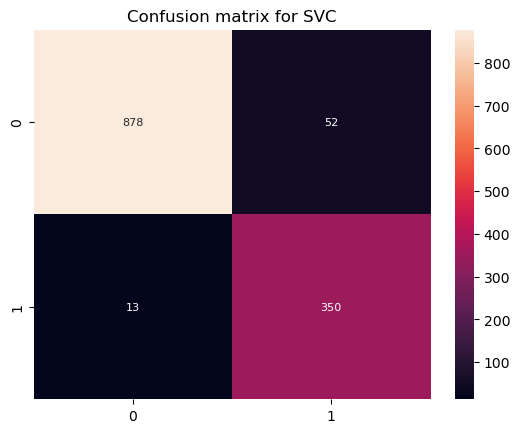

#####################################################################



##################################################################### 

The Accuracy of the GausianNB Model is :  0.9319412219644239

 The Classification Report for GausianNB : 

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       930
           1       0.82      0.97      0.89       363

    accuracy                           0.93      1293
   macro avg       0.90      0.94      0.92      1293
weighted avg       0.94      0.93      0.93      1293



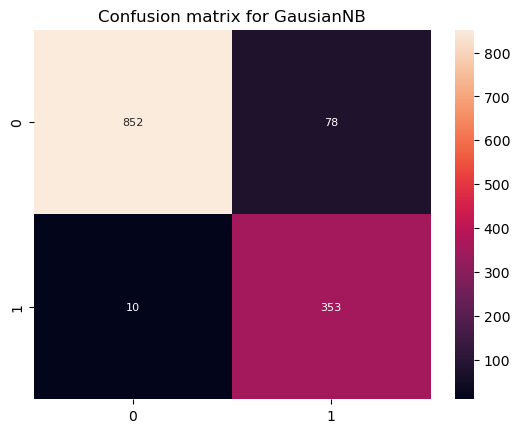

#####################################################################



##################################################################### 

The Accuracy of the MultinomialNB Model is :  0.9079659706109822

 The Classification Report for MultinomialNB : 

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       930
           1       0.80      0.89      0.84       363

    accuracy                           0.91      1293
   macro avg       0.88      0.90      0.89      1293
weighted avg       0.91      0.91      0.91      1293



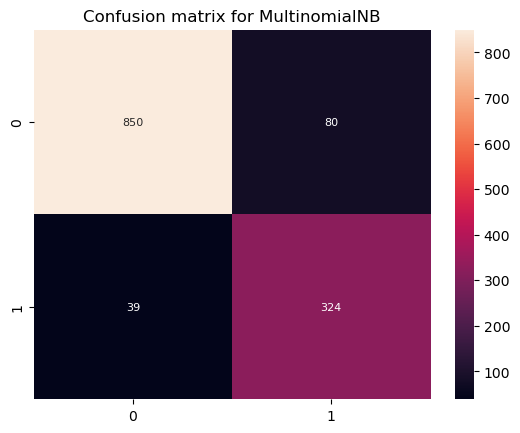

#####################################################################





In [87]:
# Calling the function and retrieving the model outputs

models = ['SVC', 'GausianNB', 'MultinomialNB']
try:
    for i in models:
        print("##################################################################### \n")
        train_model(lab2_data, i)
        print("#####################################################################")
        print('\n\n')
except Exception as e:
    print('Error : ', e)

We can observe the performance of the 3 models,

* SVC is best performing classifier with 94% Accuracy
* Multinomial Naiva Bayes is the worst performing model is 90% Accuracy.
* We can also see above all the models have trouble with generalizing the class associated with 1. This could be due to a multitude of resons such as an imbalanced class. 

### PART B

In [85]:
AB_NYCData = pd.read_csv('AB_NYC_2019.csv')

In [118]:
def remove_outliers(data,method):

    print("#####################################################################")
    print(i + '\n')
    print('Shape of the Data before removing the outliers :', data.shape)
    if method == 'Z-score':
        # Removing Outliers using Z-score method with the standard 3 as threshold
        score = np.abs(stats.zscore(data['price']))
        final_data = data[(score < 3)]
        print('Shape of the Data frame after removing outliers using the Z-score method :', final_data.shape)
        print('The number of records deleted after removing outliers : ', data.shape[0] - final_data.shape[0])
        print("##################################################################### \n")

    if method == 'Whisker':
        # Using Whisker Method to remove the outliers 
        quantile1 = AB_NYCData['price'].quantile(0.25)
        quantile3 = AB_NYCData['price'].quantile(0.75)
        iqr = quantile3 - quantile1
        lower_range = quantile1 - 1.5 * iqr
        upper_range = quantile3 + 1.5 * iqr
        final_data = AB_NYCData[(AB_NYCData['price'] >= lower_range) & (AB_NYCData['price'] <= upper_range)]
        print('Shape of the Data frame after removing outliers using the Whisker score method :', final_data.shape)
        print('The number of records deleted after removing outliers : ', data.shape[0] - final_data.shape[0])
        print("##################################################################### \n")

    else:
        None
    
    return final_data

In [119]:
methods = ['Z-score', 'Whisker']
for i in methods :
    remove_outliers(AB_NYCData,i)


#####################################################################
Z-score

Shape of the Data before removing the outliers : (48895, 16)
Shape of the Data frame after removing outliers using the Z-score method : (48507, 16)
The number of records deleted after removing outliers :  388
##################################################################### 

#####################################################################
Whisker

Shape of the Data before removing the outliers : (48895, 16)
Shape of the Data frame after removing outliers using the Whisker score method : (45923, 16)
The number of records deleted after removing outliers :  2972
##################################################################### 



We can observe the following, 

* The Z-Score method removed around 388 records.
* The Whisker method removed around 2972 records